<a href="https://colab.research.google.com/github/shizahammad/Deep-Learning-PIAIC-/blob/master/Iris_dataset_training_and_testing_with_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasets_19_420_Iris.csv to datasets_19_420_Iris.csv


In [ ]:
import io
import pandas as pd
import numpy as np

df2 = pd.read_csv(io.BytesIO(uploaded['datasets_19_420_Iris.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df2.head() #shows the first 5 rows of dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


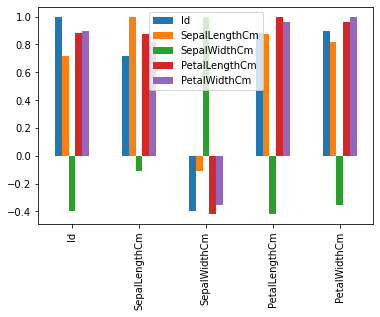

In [ ]:
df2.corr().plot(kind='bar')

In [ ]:
df2 = df2.sample(frac=1)
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
...,...,...,...,...,...,...
34,35,4.9,3.1,1.5,0.1,Iris-setosa
104,105,6.5,3.0,5.8,2.2,Iris-virginica
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
32,33,5.2,4.1,1.5,0.1,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
y=df2.Species # will contain the labels column we want to predict
x=df2.drop('Species',axis=1) # this will contain the rest of the data except colum Species which is target outcome
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(120, 5)
(30, 5)


In [ ]:
y_train = pd.get_dummies(y_train)
y_train.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
43,1,0,0
137,0,0,1
73,0,1,0
120,0,0,1
24,1,0,0


In [ ]:
y_train.drop_duplicates()

,Iris-setosa,Iris-versicolor,Iris-virginica
43,1,0,0
137,0,0,1
73,0,1,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dense(16, activation='relu', input_shape=(5,)))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=SGD(lr=0.002),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [ ]:
model.fit(x_train,y_train, epochs=30)

Epoch 1/30
4/4 [==============================] - 0s 5ms/step - loss: 2.7582 - acc: 0.4000
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 1.0771 - acc: 0.3250
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 1.1873 - acc: 0.3333
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 2.1110 - acc: 0.3500
Epoch 5/30
4/4 [==============================] - 0s 3ms/step - loss: 1.9144 - acc: 0.3583
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 2.1648 - acc: 0.3250
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 1.2021 - acc: 0.4583
Epoch 8/30
4/4 [==============================] - 0s 3ms/step - loss: 1.8304 - acc: 0.3500
Epoch 9/30
4/4 [==============================] - 0s 3ms/step - loss: 1.9432 - acc: 0.2500
Epoch 10/30
4/4 [==============================] - 0s 3ms/step - loss: 1.4021 - acc: 0.3667
Epoch 11/30
4/4 [==============================] - 0s 3ms/step - loss: 1.7422 - acc: 0.29

In [ ]:
df1 = pd.DataFrame(x_test)
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
61,62,5.9,3.0,4.2,1.5,Iris-virginica
100,101,6.3,3.3,6.0,2.5,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa
88,89,5.6,3.0,4.1,1.3,Iris-virginica
30,31,4.8,3.1,1.6,0.2,Iris-setosa


In [ ]:
df1['predict']=y_train.columns.take(np.argmax(model.predict(df1.loc[:,'Id':'PetalWidthCm']), axis=1))
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predict
61,62,5.9,3.0,4.2,1.5,Iris-virginica
100,101,6.3,3.3,6.0,2.5,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa
88,89,5.6,3.0,4.1,1.3,Iris-virginica
30,31,4.8,3.1,1.6,0.2,Iris-setosa
112,113,6.8,3.0,5.5,2.1,Iris-virginica
134,135,6.1,2.6,5.6,1.4,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-virginica
83,84,6.0,2.7,5.1,1.6,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-virginica
